In [430]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

In [431]:
mpl.rc('font', family='Noto Sans CJK TC')

In [432]:
df = pd.read_html('https://www.basketball-reference.com/players/c/curryst01.html')
len(df)

1

In [433]:
sc = df[0]
sc.head()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2009-10,21.0,GSW,NBA,PG,80,77,36.2,6.6,14.3,...,0.885,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5
1,2010-11,22.0,GSW,NBA,PG,74,74,33.6,6.8,14.2,...,0.934,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6
2,2011-12,23.0,GSW,NBA,PG,26,23,28.2,5.6,11.4,...,0.809,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7
3,2012-13,24.0,GSW,NBA,PG,78,78,38.2,8.0,17.8,...,0.900,0.8,3.3,4.0,6.9,1.6,0.2,3.1,2.5,22.9
4,2013-14,25.0,GSW,NBA,PG,78,78,36.5,8.4,17.7,...,0.885,0.6,3.7,4.3,8.5,1.6,0.2,3.8,2.5,24.0


### 真實命中率＝得分/ 2 * (總出手數＋0.44 * 罰球出手數)
公式:TS% = PTS/2*(FGA+(0.44*FTA)

意義:每消耗一個球權（失誤除外）時，可以換回多少分

In [434]:
sc1 = sc[:10]    #刪去total列
sc2 = sc1[["Season","FG","FTA","PTS"]] #選出要使用的數據

In [435]:
sc3 = sc2.loc[:,'Season':'PTS'].copy()
sc3['真實命中率'] = sc3.PTS/2*(sc3.FTA + 0.44 * sc3.FTA)
sc3

#計算真實命中率並加進表格

,Season,FG,FTA,PTS,真實命中率
0,2009-10,6.6,2.5,17.5,31.5000
1,2010-11,6.8,3.1,18.6,41.5152
2,2011-12,5.6,1.8,14.7,19.0512
3,2012-13,8.0,3.7,22.9,61.0056
4,2013-14,8.4,4.5,24.0,77.7600
5,2014-15,8.2,4.2,23.8,71.9712
6,2015-16,10.2,5.1,30.1,110.5272
7,2016-17,8.5,4.6,25.3,83.7936
8,2017-18,8.4,5.9,26.4,112.1472
9,2018-19,9.3,4.3,27.8,86.0688


In [436]:
plt.style.use('bmh')

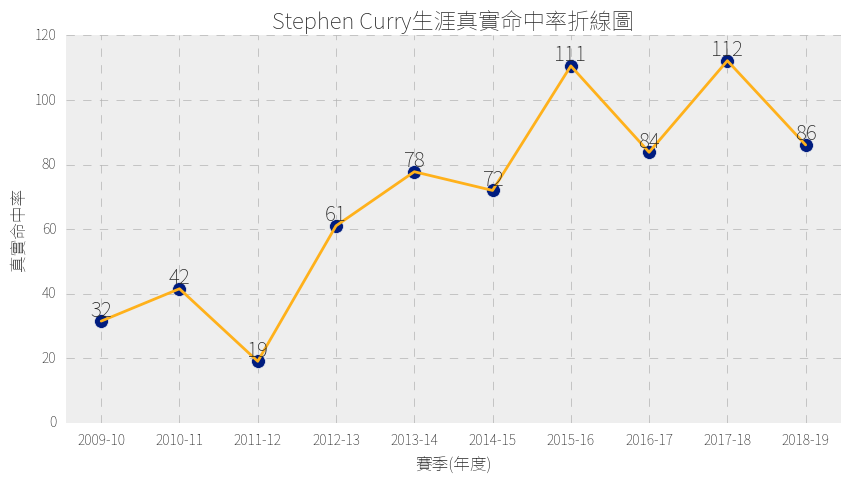

In [437]:
plt.figure(figsize=(10,5),dpi=100,linewidth = 0.6)
plt.title("Stephen Curry生涯真實命中率折線圖",fontsize = 16)
x = sc3.Season
y = sc3.真實命中率#x,y座標
for a,b in zip(x,y):#在點上顯示數值
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
plt.xlabel('賽季(年度)',fontsize = 12)
plt.ylabel('真實命中率',fontsize = 12)
plt.scatter(x,y,s = 100,marker = "o" )
plt.plot(sc3.Season,sc3.真實命中率,'#FFB11B')

### 真實命中率＝得分/ 2 * (總出手數＋0.44 * 罰球出手數)
### 公式:
$$
TS = \frac{PTS}{2(FGA+(0.44*FTA))}
$$

#### 意義:每消耗一個球權（失誤除外）時，可以換回多少分